In [1]:
import numpy as np
import pandas as pd
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl

-----------
#What do we mean by the term “Linear Model”

##A model generally consists of:
## * inputs or features - $x$
## * outputs or targets - $y$
## * model parameters - $\theta$

##Once you have determined the model parameters then you have operational model

##A Linear Model is:

##any model where the output is defined by a linear combination of inputs and model parameters
-----------

-----------
#A simple example 

##Univariate linear regression

##$$y = \theta_{1} x + \theta_{0}$$

##This is univariate because there is only a single feature - x
## * This equation defines a straight line
## * The parameters of the model are defined by θ
## * $\theta_{1}$ is called the slope of the line
## * $\theta_{0}$ is called the intercept
-----------

-----------
#A Simple Worked Example
##A straight line consisting of 3 points that go through the origin
##Formula: $y = \theta_{1} x + \theta_{0}$
##$\theta_{1} = 1$,  i.e. slope = 1
##$\theta_{0} = 0$,  i.e. no y intercept, so passes through the origin
-----------

#Dataset - Fully Cleaned = Training set

In [2]:
#m denotes the number of training examples
m = 3
x=np.array([1, 2, 3])
y=np.array([1, 2, 3])
theta1 = 1

for i in xrange(m):
    print "Feature %d: (%d, %d)" % (i, y[i], x[i])

Feature 0: (1, 1)
Feature 1: (2, 2)
Feature 2: (3, 3)


#Use matplotlib to plot the data

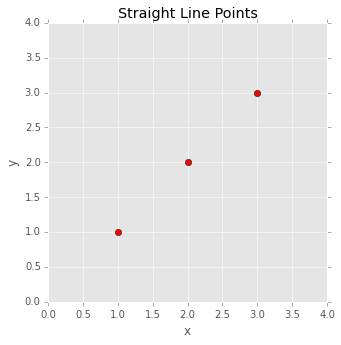

In [3]:
mpl.style.use('ggplot')
ax = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.set_xlim(0,4)
ax.set_ylim(0,4)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Straight Line Points")
ax.plot(x,y, 'ro')

#Define the Hypothesis function, $h(x)$

In [4]:
def h(x, theta1):
    return x * theta1

#Define a cost function, $J(\theta)$

##Measures the sum of squares between the predicted value ($\hat{y}$) and the known value ($y$). $\hat{y} \equiv h(x)$
##$m$ is the number of records = 3
##Single feature, $x$
##We can therefore calculate the sum of squared errors 
##$$(\hat{y}_{0}-y_{0})^{2} + (\hat{y}_{1}-y_{1})^{2} + (\hat{y}_{2}-y_{2})^{2}$$
##Then we calculate the average sum of squared errors
##$$\frac{(\hat{y}_{0}-y_{0})^{2} + (\hat{y}_{1}-y_{1})^{2} + (\hat{y}_{2}-y_{2})^{2}}{m}$$
##$$J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(y_{i}-\hat{y}_{i})^2$$

In [5]:
def J(theta1, h, x, y):
    yhat = h(x, theta1)
    sum_diff = (y - yhat)*(y - yhat)
    return (1.0/(2.0*len(x))) * sum_diff.sum()

##How does the cost function vary with the choice of $\theta_{1}$?
##What is the shape of the cost function?

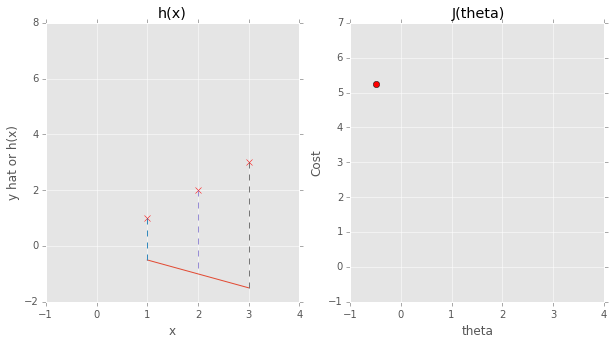

Slope = -0.50, Cost =  5.25


In [ ]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax1.set_title('h(x)')
ax1.set_xlabel("y hat or h(x)")
ax1.set_xlabel("x")
ax1.plot(x, y, 'rx')

plt.xlim(-1,5)
plt.ylim(-1,5)

ax2 = fig.add_subplot(122)
ax2.set_title('J(theta)')
ax2.set_ylabel("Cost")
ax2.set_xlabel("theta")

for theta1 in np.arange(-0.5,3.0,0.5):
    ax2.set_xlim(-1,4)
    ax2.set_ylim(-1,7)
    ax2.plot(theta1, J(theta1, h, x, y), linestyle='--', color='r', marker='o')

    ax1.set_xlim(-1,4)
    ax1.set_ylim(-2,8)
    ax1.set_ylabel("y hat or h(x)")
    ax1.set_xlabel("x")
    ax1.plot(x, h(x, theta1))
    
    for i in xrange(m):
        xc=[x[i],y[i]]
        yc=[x[i],h(x[i], theta1)]
        ax1.plot(xc, yc, '--')
    
    display.clear_output(wait=True)
    display.display(plt.gcf())
    print "Slope = {:5.2f}, Cost = {:5.2f}".format(theta1, J(theta1, h, x, y))
    
    raw_input('>>>')

#So to find the 'best' value of $\theta$ *all* we need to do is find the value of $\theta$ at the minimum of the cost function $J$

#One method to find the mininum is called Gradient Descent